Showcasing various merge techniques for two dataframes with differing numbers of values. 

In the subsequent example, we will merge two spectra with varying numbers of frequencies.

In [6]:
import pandas as pd

#load data from TSV

df1 = pd.read_csv('tsv/speech1.tsv', delimiter='\t')
df2 = pd.read_csv('tsv/conga3.tsv', delimiter='\t')

Display the dataframes and plot as 2D Plot

,Frequency (Hz),Amplitude
0,97.368421,0.000965
1,105.263158,0.005521
2,110.526316,0.002423
3,194.736842,0.001351
4,202.631579,0.003517
5,210.526316,0.007408
6,215.789474,0.005467
7,223.684211,0.004954
8,228.947368,0.003144
9,292.105263,0.001261


,Frequency (Hz),Amplitude
0,31.25,0.000569
1,75.00,0.000870
2,127.50,0.000540
3,238.75,0.003074
4,321.25,0.002468
5,393.75,0.000865
6,398.75,0.000924
7,518.75,0.000849
8,546.25,0.000567
9,600.00,0.001739


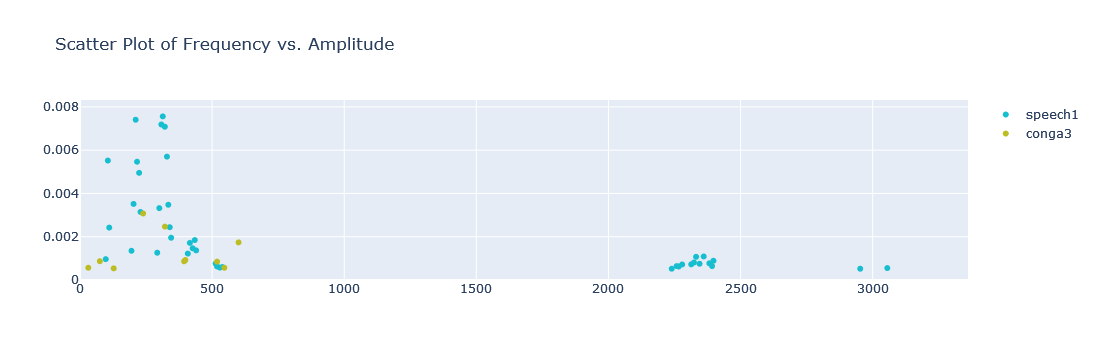

In [12]:
from multiplotter import plot_scatter

display(df1)
display(df2)

plot_scatter(dfs=[df1, df2], labels=['speech1', 'conga3'], mode='markers')

**Equal spread**

Spread values from df with less elements equally.

In [15]:
import pandas as pd
import numpy as np

# Determine which DataFrame has fewer rows
df_less, df_more = (df1, df2) if len(df1) < len(df2) else (df2, df1)

# Rename columns for clarity
df_less.columns = ['freq_data_less', 'amp_data_less']
df_more.columns = ['freq_data_more', 'amp_data_more']

# Calculate the repeat counts for each row in df_less
repeat_counts = [len(df_more) // len(df_less) + (1 if x < len(df_more) % len(df_less) else 0) for x in range(len(df_less))]

# Repeat each row in df_less according to the calculated repeat counts
df_less_repeated = pd.DataFrame(np.repeat(df_less.values, repeat_counts, axis=0), columns=df_less.columns)

# Create a new df for final result
result_equal = df_more.copy()
result_equal['freq_data2'], result_equal['amp_data2'] = df_less_repeated['freq_data_less'], df_less_repeated['amp_data_less']

# Rename the columns in the final DataFrame
column_mapping = {
    'freq_data_more': 'freq_data1',
    'amp_data_more': 'amp_data1',
    'freq_data2': 'freq_data2',
    'amp_data2': 'amp_data2'
}
result_equal = result_equal.rename(columns=column_mapping)

# Swap columns if needed
should_swap = True
if should_swap:
    result_equal[['freq_data1', 'amp_data1', 'freq_data2', 'amp_data2']] = result_equal[['freq_data2', 'amp_data2', 'freq_data1', 'amp_data1']]

display(result_equal)


,freq_data1,amp_data1,freq_data2,amp_data2
0,31.25,0.000569,97.368421,0.000965
1,31.25,0.000569,105.263158,0.005521
2,31.25,0.000569,110.526316,0.002423
3,31.25,0.000569,194.736842,0.001351
4,31.25,0.000569,202.631579,0.003517
5,75.00,0.000870,210.526316,0.007408
6,75.00,0.000870,215.789474,0.005467
7,75.00,0.000870,223.684211,0.004954
8,75.00,0.000870,228.947368,0.003144
9,127.50,0.000540,292.105263,0.001261


**Cumulative distribution function**

Cumulative distribution function will be used to spread the values in df with less elements

Determine valid range for all elements to be included:

Power range: [0.203, 1.896]


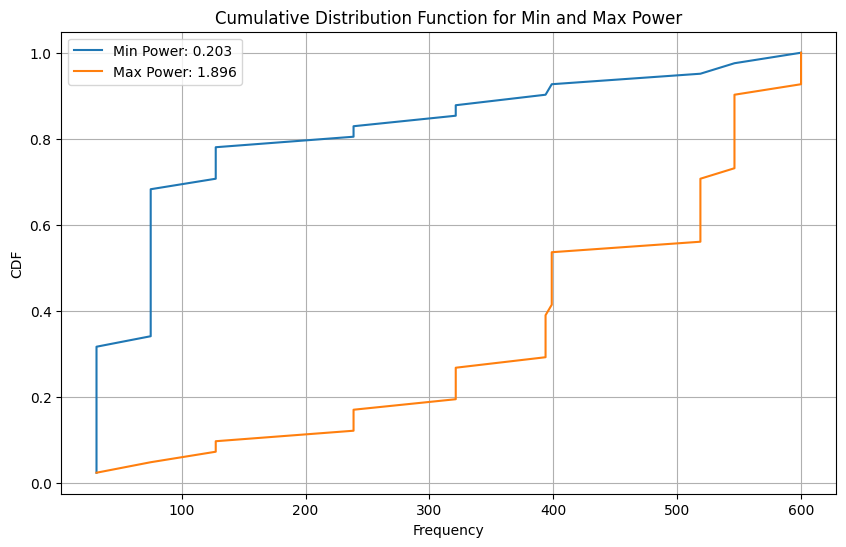

In [31]:
import matplotlib.pyplot as plt

# Determine which DataFrame has fewer rows and rename columns for clarity
if len(df1) < len(df2):
    df_cumuldist_less, df_cumuldist_more = df1.copy(), df2.copy()
    df_cumuldist_less.columns, df_cumuldist_more.columns = ['freq_data_less', 'amp_data_less'], ['freq_data_more', 'amp_data_more']
else:
    df_cumuldist_less, df_cumuldist_more = df2.copy(), df1.copy()
    df_cumuldist_less.columns, df_cumuldist_more.columns = ['freq_data_less', 'amp_data_less'], ['freq_data_more', 'amp_data_more']

def spread_values(df_less, df_more, power):
    """Distribute values from df_less into df_more based on specified power."""
    bins = np.linspace(0, 1, len(df_less))**power
    bins[0], bins[-1] = 0, 1
    thresholds = (bins[:-1] + bins[1:]) / 2
    df_more_assignment = np.linspace(0, 1, len(df_more), endpoint=False) + 0.5/len(df_more)
    df_more_bins = np.digitize(df_more_assignment, thresholds)
    df_more_bins = np.clip(df_more_bins, 0, len(df_less) - 1)
    df_more_bins[0], df_more_bins[-1] = 0, len(df_less) - 1
    df_more['freq_data_less'] = df_less.freq_data_less.iloc[df_more_bins].values
    df_more['amp_data_less'] = df_less.amp_data_less.iloc[df_more_bins].values
    
    return set(df_less.freq_data_less) <= set(df_more.freq_data_less) and set(df_less.amp_data_less) <= set(df_more.amp_data_less)

# Test power values to find the range ensuring all df_cumuldist_less values are present in df_cumuldist_more
power_values = np.linspace(0.01, 100, 100000)
valid_powers = []

min_found, max_found = False, False

for power in power_values:
    is_valid = spread_values(df_cumuldist_less, df_cumuldist_more.copy(), power)
    if is_valid:
        valid_powers.append(power)
        
        # Check for early stopping conditions
        if not min_found:
            min_valid_power = power
            min_found = True
        max_valid_power = power
        max_found = True
    elif min_found and max_found:  # We found an invalid power after finding the valid range
        break

power_range = [min_valid_power, max_valid_power]
print("Power range: [{:.3f}, {:.3f}]".format(power_range[0], power_range[1]))

# Determine which DataFrame has fewer rows and rename columns
if len(df1) < len(df2):
    df_less_cumuldist, df_more_cumuldist = df1.copy(), df2.copy()
    df_less_cumuldist.columns, df_more_cumuldist.columns = ['freq_data_less', 'amp_data_less'], ['freq_data_more', 'amp_data_more']
else:
    df_less_cumuldist, df_more_cumuldist = df2.copy(), df1.copy()
    df_less_cumuldist.columns, df_more_cumuldist.columns = ['freq_data_less', 'amp_data_less'], ['freq_data_more', 'amp_data_more']

# Apply spread_values with min and max power
df_more_cumuldist_min = df_more_cumuldist.copy()
df_more_cumuldist_max = df_more_cumuldist.copy()
spread_values(df_less_cumuldist, df_more_cumuldist_min, power_range[0])
spread_values(df_less_cumuldist, df_more_cumuldist_max, power_range[1])

# Sort frequencies for CDF
sorted_freq_min = np.sort(df_more_cumuldist_min['freq_data_less'])
sorted_freq_max = np.sort(df_more_cumuldist_max['freq_data_less'])

# Create CDF
y = np.arange(1, len(sorted_freq_min) + 1) / len(sorted_freq_min)

# Plot the CDF for min and max power
plt.figure(figsize=(10, 6))
plt.plot(sorted_freq_min, y, label=f'Min Power: {power_range[0]:.3f}')
plt.plot(sorted_freq_max, y, label=f'Max Power: {power_range[1]:.3f}')
plt.xlabel('Frequency')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function for Min and Max Power')
plt.legend()
plt.grid(True)
plt.show()


df merge according to set power value:

In [32]:
# Initial power value
power = 1.89

# Function to spread df_less values in df_more
def spread_values(df_less, df_more, power):
    # Generate the bins for each df_more value
    bins = np.linspace(0, 1, len(df_less))**power
    bins[0] = 0
    bins[-1] = 1
    thresholds = (bins[:-1] + bins[1:]) / 2
    df_more_assignment = np.linspace(0, 1, len(df_more), endpoint=False) + 0.5/len(df_more)

    # Redistribute df_more values to ensure each df_less bin is used at least once
    df_more_bins = np.digitize(df_more_assignment, thresholds)

    # Correct the bins exceeding the df_less's length
    df_more_bins = np.where(df_more_bins >= len(df_less), len(df_less)-1, df_more_bins)

    # Make sure the last value of df_more is always assigned to the last value of df_less
    df_more_bins[-1] = len(df_less) - 1

    # Make sure the first value of df_more is always assigned to the first value of df_less
    df_more_bins[0] = 0

    # Assign the df_less values to df_more based on the bins
    df_more['freq_data_less'] = df_less.freq_data_less.iloc[df_more_bins].values
    df_more['amp_data_less'] = df_less.amp_data_less.iloc[df_more_bins].values
    return df_more

# Determine which DataFrame has fewer rows
df_less, df_more = (df1.copy(), df2.copy()) if len(df1) < len(df2) else (df2.copy(), df1.copy())

# Rename columns for clarity
df_less.columns = ['freq_data_less', 'amp_data_less']
df_more.columns = ['freq_data_more', 'amp_data_more']

# Spread df_less values in df_more with the initial power
df_more_spread = spread_values(df_less, df_more, power)

# Set this to True if you want to swap the columns
should_swap = False

result_cumuldist = df_more_spread[['freq_data_less', 'amp_data_less', 'freq_data_more', 'amp_data_more']]

# Swap columns if needed
if should_swap:
    cols_to_swap1 = ['freq_data_less', 'amp_data_less']
    cols_to_swap2 = ['freq_data_more', 'amp_data_more']
    result_cumuldist = swap_columns(result_cumuldist, cols_to_swap1, cols_to_swap2)

# Rename the columns to the desired names
result_cumuldist.columns = ['freq_data1', 'amp_data1', 'freq_data2', 'amp_data2']

display(result_cumuldist)


,freq_data1,amp_data1,freq_data2,amp_data2
0,31.25,0.000569,97.368421,0.000965
1,75.00,0.000870,105.263158,0.005521
2,127.50,0.000540,110.526316,0.002423
3,127.50,0.000540,194.736842,0.001351
4,238.75,0.003074,202.631579,0.003517
5,238.75,0.003074,210.526316,0.007408
6,238.75,0.003074,215.789474,0.005467
7,321.25,0.002468,223.684211,0.004954
8,321.25,0.002468,228.947368,0.003144
9,321.25,0.002468,292.105263,0.001261


 **Sigmoid function distribution**

determine valid range:

Sigmoid range: [1.358, 7.064]


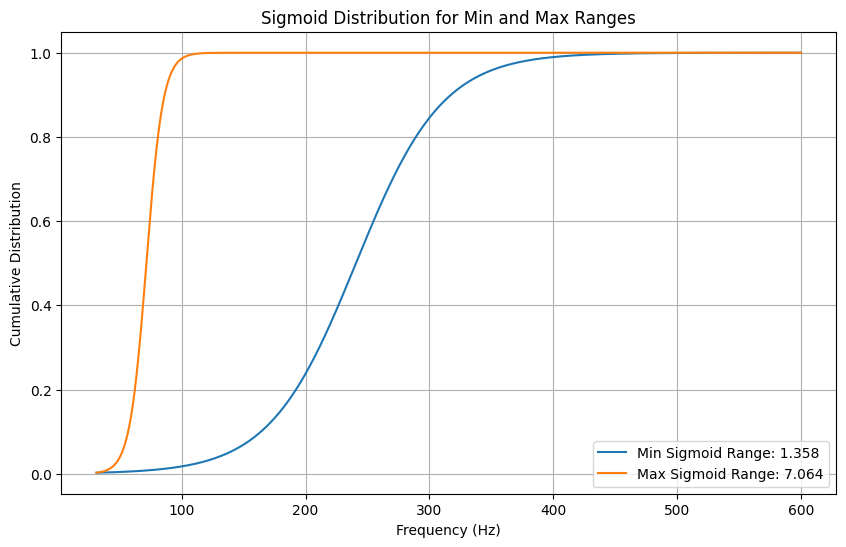

In [37]:
from scipy.special import expit

def sigmoid_spread(df_less, df_more, sigmoid_range):
    """Distribute values from df_less into df_more based on a specified sigmoid range."""
    # Generate sigmoid distributions for df_less and df_more
    sigmoid_dist_more = expit(np.linspace(-6, 6, df_more.shape[0]))
    sigmoid_dist_less = expit(np.linspace(-sigmoid_range, sigmoid_range, df_less.shape[0]))
    
    # Map bins to df_less values
    bins_to_values = dict(zip(sigmoid_dist_less, df_less['freq_data_less'].values))
    
    # For each value in sigmoid_dist_more, find the closest bin in sigmoid_dist_less
    df_more_values = [bins_to_values[min(bins_to_values.keys(), key=lambda bin: abs(bin - value))] for value in sigmoid_dist_more]
    
    return set(df_less['freq_data_less'].values) <= set(df_more_values)

# Determine which DataFrame has fewer rows and rename columns
if len(df1) < len(df2):
    df_sigmoid_less, df_sigmoid_more = df1.copy(), df2.copy()
    df_sigmoid_less.columns, df_sigmoid_more.columns = ['freq_data_less', 'amp_data_less'], ['freq_data_more', 'amp_data_more']
else:
    df_sigmoid_less, df_sigmoid_more = df2.copy(), df1.copy()
    df_sigmoid_less.columns, df_sigmoid_more.columns = ['freq_data_less', 'amp_data_less'], ['freq_data_more', 'amp_data_more']

# Test sigmoid_range values to find the valid range
sigmoid_range_values = np.linspace(0.01, 100, 100000)
valid_ranges = []

min_found, max_found = False, False

for sigmoid_range in sigmoid_range_values:
    is_valid = sigmoid_spread(df_sigmoid_less, df_sigmoid_more.copy(), sigmoid_range)
    if is_valid:
        valid_ranges.append(sigmoid_range)
        
        # Check for early stopping conditions
        if not min_found:
            min_valid_range = sigmoid_range
            min_found = True
        max_valid_range = sigmoid_range
        max_found = True
    elif min_found and max_found:  # We found an invalid range after finding the valid range
        break

print("Sigmoid range: [{:.3f}, {:.3f}]".format(min_valid_range, max_valid_range))

# Get min and max frequency values from df_sigmoid_less
min_freq = df_sigmoid_less['freq_data_less'].min()
max_freq = df_sigmoid_less['freq_data_less'].max()

# Generate a sigmoid distribution for the min and max ranges
num_bins = 1000  # Set this to the number of bins you want for your plot
sigmoid_bins = np.linspace(min_freq, max_freq, num_bins)

# Calculate the sigmoid distributions for the computed min and max ranges
min_sigmoid_distribution = expit((sigmoid_bins - min_freq) / (max_freq - min_freq) * 12 * min_valid_range - 6)
max_sigmoid_distribution = expit((sigmoid_bins - min_freq) / (max_freq - min_freq) * 12 * max_valid_range - 6)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_bins, min_sigmoid_distribution, label=f'Min Sigmoid Range: {min_valid_range:.3f}')
plt.plot(sigmoid_bins, max_sigmoid_distribution, label=f'Max Sigmoid Range: {max_valid_range:.3f}')
plt.title('Sigmoid Distribution for Min and Max Ranges')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Cumulative Distribution')
plt.legend()
plt.grid()
plt.show()

df merge according to set sigmoid range:

In [36]:
# Set the sigmoid range
sigmoid_range = 1.36 # Set this to control the range of the sigmoid function for df_sigmoid_less

# Generate a sigmoid distribution for df_sigmoid_less
num_bins_df_less = df_sigmoid_less.shape[0]
sigmoid_bins_df_less = np.linspace(-sigmoid_range, sigmoid_range, num_bins_df_less)
sigmoid_distribution_df_less = expit(sigmoid_bins_df_less)

# Create a mapping from bins to df_sigmoid_less values
df_less_bins_to_values = {bin: value for bin, value in zip(sigmoid_distribution_df_less, df_sigmoid_less['freq_data_less'].values)}

# Generate a sigmoid distribution for df_sigmoid_more
num_bins_df_more = df_sigmoid_more.shape[0]  # Set this to the number of bins you want for df_sigmoid_more
sigmoid_bins_df_more = np.linspace(-6, 6, num_bins_df_more)
sigmoid_distribution_df_more = expit(sigmoid_bins_df_more)

# For each value in sigmoid_distribution_df_more, find the closest bin in sigmoid_distribution_df_less and get the corresponding df_sigmoid_less value
df_more_values = [df_less_bins_to_values[min(df_less_bins_to_values.keys(), key=lambda bin: abs(bin - value))] for value in sigmoid_distribution_df_more]

# Add these values to df_sigmoid_more
df_sigmoid_more['freq_data_less'] = df_more_values
df_sigmoid_more['amp_data_less'] = df_sigmoid_less.set_index('freq_data_less').loc[df_sigmoid_more['freq_data_less']]['amp_data_less'].values

# Set this to True if you want to swap the columns
should_swap = True

# Define the final DataFrame
result_sigmoid = df_sigmoid_more[['freq_data_less', 'amp_data_less', 'freq_data_more', 'amp_data_more']]

# Swap columns if needed
if should_swap:
    cols_to_swap1 = ['freq_data_less', 'amp_data_less']
    cols_to_swap2 = ['freq_data_more', 'amp_data_more']
    result_sigmoid = swap_columns(result_sigmoid, cols_to_swap1, cols_to_swap2)

# Rename the columns in the final DataFrame
column_mapping = {
    'freq_data_more': 'freq_data1', 
    'amp_data_more': 'amp_data1',
    'freq_data_less': 'freq_data2',
    'amp_data_less': 'amp_data2'
}

result_sigmoid = result_sigmoid.rename(columns=column_mapping)

display(result_sigmoid)


,freq_data2,amp_data2,freq_data1,amp_data1
0,97.368421,0.000965,31.25,0.000569
1,105.263158,0.005521,31.25,0.000569
2,110.526316,0.002423,31.25,0.000569
3,194.736842,0.001351,31.25,0.000569
4,202.631579,0.003517,31.25,0.000569
5,210.526316,0.007408,31.25,0.000569
6,215.789474,0.005467,31.25,0.000569
7,223.684211,0.004954,31.25,0.000569
8,228.947368,0.003144,31.25,0.000569
9,292.105263,0.001261,31.25,0.000569


Add value for transition duration:

In [17]:
import pandas as pd
import numpy as np
from multiplotter import plot_combined

def process_df(input_df, freq_start_col, amp_start_col, freq_stop_col, amp_stop_col, wave_stop_value, override_amp_value=None, scale_amp_value=True):
    # Scaling amplitude if required
    if scale_amp_value:
        amp_start_scaled = input_df[amp_start_col] / input_df[amp_start_col].max()
        amp_stop_max = input_df[amp_stop_col] / input_df[amp_stop_col].max()
    else:
        amp_start_scaled = input_df[amp_start_col]
        amp_stop_max = input_df[amp_stop_col]
    
    # Overriding amplitude values if required
    if override_amp_value is not None:
        amp_min = [override_amp_value] * len(input_df)
        amp_max = [override_amp_value] * len(input_df)
    else:
        amp_min = amp_start_scaled
        amp_max = amp_stop_max

    new_data = {
        "freq_start": input_df[freq_start_col],
        "freq_stop": input_df[freq_stop_col],
        "time_start": [0.0] * len(input_df),
        "time_stop": [wave_stop_value] * len(input_df),
        "amp_min": amp_min,
        "amp_max": amp_max
    }
    
    return pd.DataFrame(new_data)

wave_stop_value = 15.0
override_amp_value = None
scale_amp_value = True

new_df = process_df(result_sigmoid, 'freq_data1', 'amp_data1', 'freq_data2', 'amp_data2', wave_stop_value, override_amp_value, scale_amp_value)
display(new_df)

,freq_start,freq_stop,time_start,time_stop,amp_min,amp_max
0,31.25,97.368421,0.0,15.0,0.185020,0.127585
1,31.25,105.263158,0.0,15.0,0.185020,0.730145
2,31.25,110.526316,0.0,15.0,0.185020,0.320386
3,31.25,194.736842,0.0,15.0,0.185020,0.178615
4,31.25,202.631579,0.0,15.0,0.185020,0.465142
5,31.25,210.526316,0.0,15.0,0.185020,0.979685
6,31.25,215.789474,0.0,15.0,0.185020,0.722938
7,31.25,223.684211,0.0,15.0,0.185020,0.655112
8,31.25,228.947368,0.0,15.0,0.185020,0.415782
9,31.25,292.105263,0.0,15.0,0.185020,0.166797


Save your data as TSV with time domain data

In [20]:
import os
from datetime import datetime

# Define the path for the /tsv subfolder
output_directory = 'tsv'

# Check if the directory exists; if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the filename path to save inside the /tsv subfolder
filename = os.path.join(output_directory, 'sigmoid_low.tsv')

try:
    new_df.to_csv(filename, sep='\t', index=False)
    print(f"Data saved successfully to {os.path.abspath(filename)} at {datetime.now()}.")
except:
    print("Error: data could not be saved.")


Data saved successfully to /Users/egor/Documents/GitHub/audiospylt/tsv/sigmoid_low.tsv at 2023-09-24 17:45:15.146436.
